[「Jupyter Advent Calendar 2017 10日目」](https://qiita.com/advent-calendar/2017/jupyter) の記事です。  

今回はJupyter上から可視化できるツールのなかで、あまり日の当たってないものにスポットライトを当ててみたいと思います。  
これはと思うものがあれば試してみていただけると幸甚です。

## Lightning

http://lightning-viz.org

APIベースの可視化ツールです、herokuやdockerからなどから環境を構築できます。  
今回はJupyter上からの事例を紹介しますが、サーバを建てたほうが威力をはっきするかもしれません。

### Jupyterに出力

Jupyter Notebook上に出力するには下記のオプションを指定します。


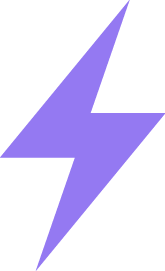

Running local mode, some functionality limited.



In [1]:
from lightning import Lightning

lgn = Lightning(ipython=True, local=True)

### 散布図

散布図の例です、ツールチップにラベルをつけることが簡単にできます。  

In [2]:
import numpy as np

np.random.seed(10)
lgn.scatter(x=np.random.rand(10), y=np.random.rand(10),
            labels=list('abcdefghij'))

マーカ(丸い点)をクリックしてみてください、ツールチップが表示されます。  
ほかのツールではマウスカーソルを動かすとツールチップが解除されますが、Lightningでは表示されたままになるので、プレゼンなどで特定の座標を強調したいときに使えそうです。

### ネットワーク図

簡単に書けます。

In [3]:
import numpy as np

nw_data = np.random.rand(100, 100)
nw_data[nw_data < 0.97] = 0
lgn.force(nw_data)

散布図と同じようにマーカをクリックすると関係している箇所のみが描画されます。

### 弦グラフ

これも簡単です。

In [4]:
connections = np.random.rand(50, 50)
connections[connections < 0.98] = 0

lgn.circle(connections,
           labels=['node ' + str(x) for x in range(50)])

グルーピングもできます。

In [5]:
group = (np.random.rand(50) * 3).astype('int')
lgn.circle(connections,
           labels=['group ' + str(x) for x in group],
           group=group)

### ヒートマップ

ラベリングや値の埋め込みがあっという間にできます。

In [6]:
n, m = (8, 16)
mat_data = np.arange(n * m).reshape(n, m)
rows = ['row ' + str(i) for i in range(n)]
columns = ['col ' + str(i) for i in range(m)]

lgn.matrix(mat_data,
           row_labels=rows,
           column_labels=columns,
           numbers=True)

### 地図

世界地図(国ごと)と米国(州ごと)のデータを地図上に濃淡をつけて可視化できます。

In [7]:
countries = ['USA', 'CHN', 'JPN', 'DEU', 'GBR',
             'FRA', 'IND', 'ITA', 'BRA', 'CAN']

values = (np.random.rand(len(countries)) * 5).astype('int')
lgn.map(countries, values)

# Plotly

https://plot.ly

商用でも利用されているだけあって、機能が豊富です。  
今回はpandasのDataFrameから直接プロットできるものを少し紹介します。

In [8]:
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import pandas as pd

### テーブル描画

`create_table` 使うといい感じに表示してくれます。下記はリストになっていますがDataFrameにも対応しています。  
下記の例ではHTMLのタグを埋め込んでいますが、スクレイピングしたデータを整理して表示するなどに使えそうです。  
また、Tableオブジェクトを作ると、細かいStyleも色々設定できます。詳細は [こちら](https://plot.ly/python/table/) を参照してみてください。

In [9]:
data_matrix = [['紙の本', '電子版'],
               ['<a href="https://www.amazon.co.jp/gp/product/4774192236/">amazon</a>',
                '<a href="https://gihyo.jp/dp/ebook/2017/978-4-7741-9249-9">Gihyo Digital Publishing</a>'],
               ['<a href="http://7net.omni7.jp/detail_isbn/978-4-7741-9223-9">7netショッピング</a>',
                '<a href="https://www.amazon.co.jp/o/ASIN/B075F3CHZ4/">Amazon Kindle</a>'],
               ['<a href="https://honto.jp/netstore/pd-book_28642230.html">honto</a>',
                '<a href="https://booklive.jp/product/index/title_id/465085/">BookLive!</a>'],
               ['<a href="http://www.yodobashi.com/product/100000009002841071/">ヨドバシ.com</a>',
                '<a href="https://books.rakuten.co.jp/rk/ea83806a182b31f7a73b1bea530b2b22/">楽天kobo</a>']]

iplot(ff.create_table(data_matrix))

### pandasのDataFrameから直接描画

cufflinksを使うと、pandasのDataFrameから `iplot` というメソッドが使えるようになります。  
cufflinksはpipでインスールできます。

```
pip install cufflinks
```

In [10]:
import cufflinks as cf

### 折れ線グラフ

なんとなく株価っぽいデータを作成し、時系列データを描画してみます。

In [11]:
x = pd.date_range('2017-01-01', '2017-12-31')
y = np.random.rand(len(x), 2) - 0.5

stock_df = pd.DataFrame(y, index=x, columns=['data1', 'data2'])
stock_df.iloc[0] = 1
stock_df = stock_df.cumsum()

In [12]:
iplot(stock_df.iplot(asFigure=True))

マウスカーソルを当てるとツールチップが出てきます。かなり見やすくて個人的に気に入ってる機能です。

### サブプロット

pandasと同様に `subplots=True` を設定するとサブプロットに分割されます。

In [13]:
iplot(stock_df.iplot(subplots=True, asFigure=True))

### バブルチャート

キーワード引数 `size` に3次元目のデータを渡します。

In [14]:
df = pd.DataFrame(np.random.randn(30, 3),
                 columns=['data1', 'data2', 'data3'])

In [15]:
iplot(df.iplot(kind='bubble',
               x='data1', y='data2', size='data3',
               asFigure=True))

### 散布図行列

seabornでおなじみのpairplotです。pandasやseabornと同じくらい簡単に書けます。

In [16]:
iplot(df.scatter_matrix(asFigure=True))

### 箱ひげ図

boxplotはpandasと同じくらい簡単に書けます。四分位値がツールチップに出てくるのが親切です。

In [17]:
iplot(df.iplot(kind='box', asFigure=True))

## python-highcharts
https://github.com/kyper-data/python-highcharts

highchartsのPythonラッパです。highchartsはPlotlyと同じく商用でも利用されています。  
highchartsのほとんどの機能をPythonで実装できるというスグレモノなのですが、なぜか流行ってません。

### Jupyterに出力

なにもしなくてもJupyter上に出力してくれます。

In [18]:
from highcharts import Highchart, Highstock

データ形式は少々めんどうですが、下記のように入れ子のリストで渡す必要があります。

```
[[x1, y1], [x2, y2], [x3, y3] ...]
```

In [19]:
data1 = stock_df.reset_index()[['index', 'data1']].values.tolist()
data2 = stock_df.reset_index()[['index', 'data2']].values.tolist()

In [20]:
H = Highstock(width=600, height=300)
H.add_data_set(data1, name='data1')
H.add_data_set(data2, name='data2')

In [21]:
H

細かい説明は省きますが、色々クリックしたりドラッグすると時系列のスコープが変化します。  
特になにも設定しなくても、Highstockはいい感じに時系列データをインタラクティブに操作できるため、個人的には非常に重宝しています。

### ドリルダウン

グラフをクリックすると更に別なグラフを出すことができます。一つのグラフでは表現できないときに便利です。  
最初に出すグラフの要素を辞書で用意し、要素名・データ・ドリルダウン先の名前を登録します。

In [22]:
H = Highchart(width=400, height=200)

data = [{
    'name': "groupA",
            'y': 10,
            'drilldown': "groupA"
}, {
    'name': "groupB",
            'y': 8,
            'drilldown': "groupB"
}, {
    'name': "groupC",
            'y': 6,
            'drilldown': "groupC"
}]

group_a = [["A1", 30],
           ["A2", 20],
           ["A3", 50]]

group_b = [["B1", 40],
           ["B2", 20],
           ["B3", 40]]

group_c = [["C1", 60],
           ["C2", 30],
           ["C3", 10]]

H.add_data_set(data, 'column', colorByPoint=True)
H.add_drilldown_data_set(group_a, 'pie', 'groupA', name='groupA')
H.add_drilldown_data_set(group_b, 'pie', 'groupB', name='groupB')
H.add_drilldown_data_set(group_c, 'pie', 'groupC', name='groupC')

In [23]:
H

グラフの各要素をクリックすると円グラフになります。  

このような対話型・探索型の可視化はPythonではあまり事例を見かけませんが、今後流行っていくかもしれませんね(毎年言ってる気がする...)。